In [1]:
#all imports for project 
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

import modeling as m
import explore as e
import wrangle as w

import warnings
warnings.filterwarnings("ignore")


np.random.seed(100)


In [2]:
# get data clean data set 
df = w.get_clean_data()

## Target variable - Operating Margin
How much profit company makes on a dollar of sales after paying variable costs but before paying interest or tax.

## Data Dictionary 

| Feature | Definition |
|:--------|:-----------|
|Retailer| Specific store: Amazon, Foot Locker, Kohl's, Sports Direct, Walmart, West Gear|
|Region| Geographic Region in United States: Northeast, Midwest South, Southeast, West |
|Product| Products sold by retailer: men and women's footwear and apparel|
|Operating Margin| operating income/revenue|
|Sales Method | The method of sale: In Store, Online and Outlet |

In [3]:
# split data for exploration 
train,validate,test= w.split_data(df)

## What is the central tendency of the data? 

In [4]:
#table of median and mean
e.table(train)

Metric         Value
----------  --------
Median      0.41
Mean        0.423395
Difference  0.013395


## Takeaways 
- Minimal outliers if any considering the mean and median are not far apart
- For performance evaluation, exceeding .423 is above average and potentially exceptional 



## Does region have a relationship with operating margin? 

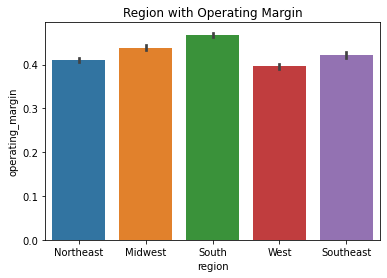

In [5]:
# barplot visual
e.barplot(train,"region","operating_margin","Region with Operating Margin")

## Hypothesis

Ho: There is not a significant difference in the mean operating margin across Regions.<br>
Ha: There is a significant difference in the mean operating margin across Regions.

In [6]:
#create region dataframes for statistical testing 
n_east,midwest,south,west,s_east = w.region_data_frames(train)

In [7]:
# statistical test evaluation
e.anova_test(n_east,midwest,south,west,s_east)

Kruska Result = 309.2166
p = 1.113012461973387e-65


##  Takeaways 

- South region has the highest operating margin 
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- Business takeaway, south region may be best region to continue to expand in

## Is there a relationship between operating margin and Retailers? 

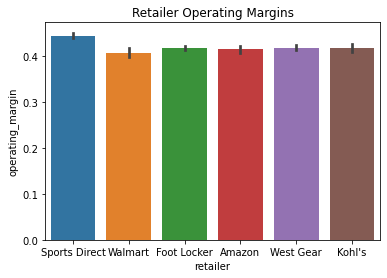

In [8]:
# barplot visual
e.barplot(train,"retailer", "operating_margin","Retailer Operating Margins")


## Hypothesis

Ho: There is not a significant difference in the mean operating margin across Retailers.<br>
Ha: There is a significant difference in the mean operating margin across Retailers.

In [9]:
#creating retail dataframes for statistical test 
sports_direct,walmart,foot_locker,amazon,west_gear,kohls = w.retailer_data_frames(train)

In [10]:
# statistical test results 
e.anova_test_six(sports_direct,walmart,foot_locker,amazon,west_gear,kohls)

Kruska Result = 48.8301
p = 2.403965243243204e-09


## Takeaways 
- The retailer with the highest operating margin is Sports Direct
- The remaining retailers have a similar operating margin, except Walmart
- Walmart appears to be underperforming relative to its peers 
- Retailer is a feature that should be considered for modeling 



## Is there a relationship between operating margin and sales method?

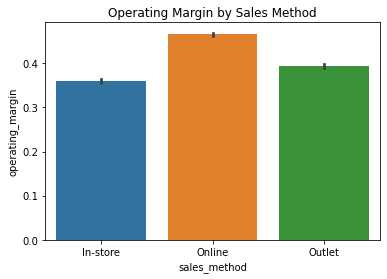

In [11]:
# barplot visual
e.barplot(train,"sales_method", "operating_margin","Operating Margin by Sales Method")

## Hypothesis
    
Ho: There is not a significant difference in the mean operating margin across sales methods.<br>
Ha: There is a significant difference in the mean operating margin across sales methods.

In [12]:
#statistical test results 
e.anova_test_sales(train)

Kruska Result = 1168.4619
p = 1.8695019652572764e-254


## Takeaways 
- Online Sales appears to have the highest operating margin 
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 

## Is there a relationship between products sold and operating margin?

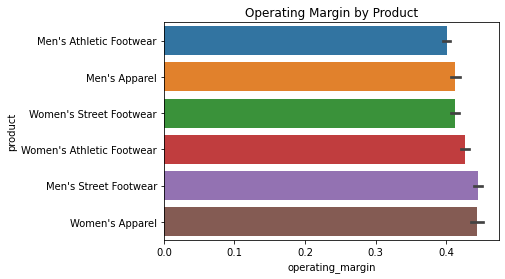

In [13]:
# barplot visual
e.barplot(train,"operating_margin","product","Operating Margin by Product")

## Hypothesis

Ho: There is not a significant difference in the mean operating margin across products.<br>
Ha: There is a significant difference in the mean operating margin across the products

In [14]:
#statistical test results 
e.anova_test_products(train)

Kruska Result = 167.5372
p = 2.4462474817537047e-34


## Takeaways 
- There is a relationship between product and operating margin 
- Apparel will be considered for modeling 
- Women's apparel and Men's street footwear appear to have the highest profit margins


## Exploration Summary

- The median operating margin is 41%
- The mean property value is 42.3%
- There is a significant relationship between region and operating margin
- Region should be a factor considered for modeling
- Retailer is a feature that should be considered for modeling 
- The retailer with the highest operating margin is Sports Direct
- Sales method appears to have a signficant relationship with operating margin 
- Sales method should be a feature considered for modeling 
- There is a relationship between product and operating margin 
- Product will be considered for modeling 


## Modeling

### Introduction

- I will use Root Mean Squared error as my evaluation metric
- My baseline model is created from the Root Mean Squared error (RMSE) of the mean operating margin
- The best combination of features for modeling were each region, each sales method,  each retailer and each product
- Models will be evaluated on train and validate data sets 
- The model that performs the best will be evaluated on the test data

In [15]:
# preparing dataframes for modeling
X_train, X_validate, X_test, y_train, y_validate, y_test = w.dataframe_prep(train,validate,test)

## Baseline Model

In [16]:
# model performance
rmse_baseline_train = m.baseline_model(y_train)

RMSE for Baseline Model using Mean
Train/In-Sample:  0.0975


### Linear regression

In [17]:
# model performance
m.linear_reg_model_train(X_train,y_train,rmse_baseline_train)

RMSE for Linear Regression Model
Training/In-Sample:  0.08171954010526856
Percent Improvement Compared to Baseline:  16.151258846001035


### Decision Tree Regressor

In [18]:
# model performance
m.tree_reg_model_train(X_train,y_train,rmse_baseline_train)

RMSE for Decion Tree Regressor Model
Training/In-Sample:  0.06438244783474624
Percent Improvement Compared to Baseline:  33.94006872282389


### Tweedie Regressor 

In [19]:
# model performance
m.tweedie_regressor_train(X_train,y_train,rmse_baseline_train)

RMSE for Tweedie Regressor Model
Training/In-Sample:  0.08178153082540356
Percent Improvement Compared to Baseline:  16.08765295884292


## Validate Stage of Modeling 

### Decision Tree Regressor Model


In [20]:
# model performance
m.tree_reg_model_validate(X_train,y_train,X_validate,y_validate,rmse_baseline_train)

RMSE for Tweedie Regressor Model
Validate/Out-of-Sample:  0.06749690026163832
Percent Improvement Compared to Baseline:  30.744469297735076


### Linear Regression Model

In [21]:
# model performance
m.linear_reg_model_validate(X_train,y_train,X_validate,y_validate,rmse_baseline_train)

RMSE for Linear Regression Model
Validate/Out-of-Sample:  0.08123598819149196
Percent Improvement Compared to Baseline:  16.647409695608687


### Tweedie Regressor Model

In [22]:
# model performance
m.tweedie_model_validate(X_train,y_train,X_validate,y_validate,rmse_baseline_train)

RMSE for Tweedie Regressor Model
Validate/Out-of-Sample:  0.08131789632677168
Percent Improvement Compared to Baseline:  16.563367445436583


## Test Model

In [23]:
# model performance
m.test_model(X_train,y_train,X_test,y_test,rmse_baseline_train)

RMSE for Decion Tree Regressor Model
Test/Out-of-Sample:  0.06793813276341196
Percent Improvement Compared to Baseline:  30.291740491597757


## Conclusion

### Summary
- Operating margin has a relationship with region,retailer,sale method and product 
- Women's apparel and Men's street footwear appear to have the highest profit margins
- Online Sales appears to have the highest operating margin of sales methods
- The retailer with the highest operating margin is sports direct
- Walmart appears to be underperforming relative to its peers
- South region has the highest operating margin 
- Operating Margin has few outliers considering the difference median and mean is approximately 1% 



### Modeling Summary 
- The best combination of features for modeling are each region, sales method, retailer and product
- The best performing model was a Decision Tree Regressor which beat the baseline by 30%


### Recommendations
* Provide Walmart less inventory and shift inventory to better performing retailer
* Sales department reach out to the retailer sports direct to find out if they are opening more locations


### Next Steps
* Research if data supports decreasing the number of stores in certain cities or states based on how much of their operating margin comes from online sales  
